In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading pac

True

In [2]:
data = pd.read_csv('data/shu-jiao-fu-zhou/csv/detailed-reviews-of-shu-jiao-fu-zhou.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Shu Jiao Fu Zhou,5,Peanut noodles for the win,2024-03-28 15:06:24.812204
1,Shu Jiao Fu Zhou,5,I spent about 10 dollars on an amazing meal! T...,2024-03-28 15:06:24.855297
2,Shu Jiao Fu Zhou,5,A hidden restaurant. Please dont become famous...,2024-03-28 06:06:24.865053
3,Shu Jiao Fu Zhou,5,It will cost you more to take the subway here ...,2024-03-27 20:06:24.873979
4,Shu Jiao Fu Zhou,3,NaN,2024-03-27 17:06:24.903250
...,...,...,...,...
1959,Shu Jiao Fu Zhou,4,"This place may look run down, but I assure you...",2015-03-28 17:09:31.276268
1960,Shu Jiao Fu Zhou,5,NaN,2015-03-28 17:09:32.069266
1961,Shu Jiao Fu Zhou,5,NaN,2015-03-28 17:09:32.071643
1962,Shu Jiao Fu Zhou,5,"Five dollars for 7 dumplings, peanut noodles, ...",2015-03-28 17:09:32.073873


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_1519/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Shu Jiao Fu Zhou,5,Peanut noodles for the win,2024
1,Shu Jiao Fu Zhou,5,I spent about 10 dollars on an amazing meal! T...,2024
2,Shu Jiao Fu Zhou,5,A hidden restaurant. Please dont become famous...,2024
3,Shu Jiao Fu Zhou,5,It will cost you more to take the subway here ...,2024
4,Shu Jiao Fu Zhou,3,NaN,2024
...,...,...,...,...
1959,Shu Jiao Fu Zhou,4,"This place may look run down, but I assure you...",2015
1960,Shu Jiao Fu Zhou,5,NaN,2015
1961,Shu Jiao Fu Zhou,5,NaN,2015
1962,Shu Jiao Fu Zhou,5,"Five dollars for 7 dumplings, peanut noodles, ...",2015


Charts for ratings

<AxesSubplot: >

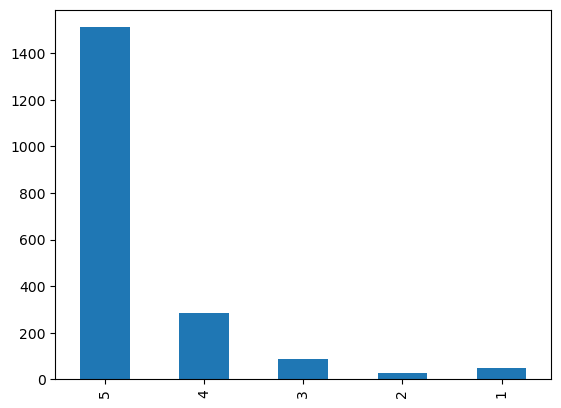

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

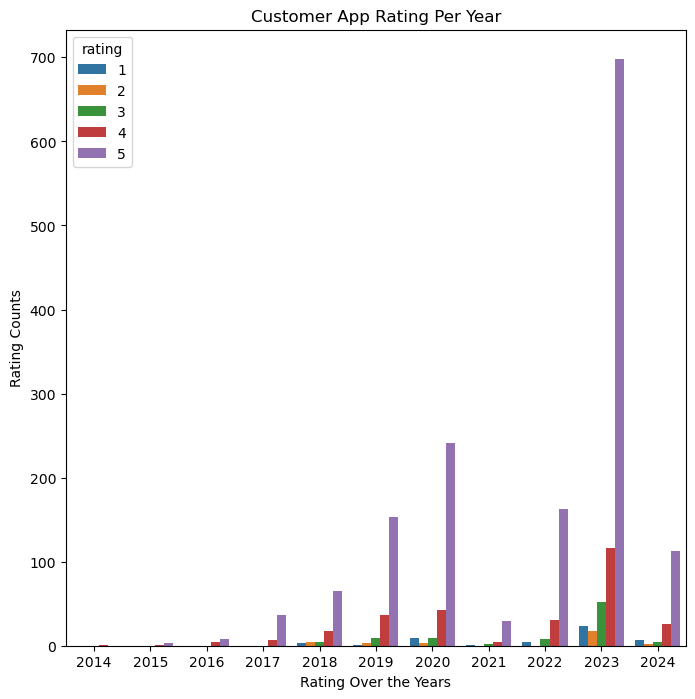

In [7]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [8]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13273/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,Peanut noodles for the win
1,I spent about 10 dollars on an amazing meal! T...
2,A hidden restaurant. Please dont become famous...
3,It will cost you more to take the subway here ...
4,<NA>
...,...
1959,"This place may look run down, but I assure you..."
1960,<NA>
1961,<NA>
1962,"Five dollars for 7 dumplings, peanut noodles, ..."


In [9]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [11]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13273/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Shu Jiao Fu Zhou,5,Peanut noodles for the win,2024,peanut noodl win
1,Shu Jiao Fu Zhou,5,I spent about 10 dollars on an amazing meal! T...,2024,spent dollar amaz meal pork chive dumpl dumpl ...
2,Shu Jiao Fu Zhou,5,A hidden restaurant. Please dont become famous...,2024,hidden restaur dont famou peanut butter noodl
3,Shu Jiao Fu Zhou,5,It will cost you more to take the subway here ...,2024,cost subway back eat incred world blink ve com...
4,Shu Jiao Fu Zhou,3,<NA>,2024,


In [12]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('dumpl', 964),
 ('noodl', 641),
 ('food', 537),
 ('peanut', 436),
 ('good', 417),
 ('place', 414),
 ('price', 321),
 ('cheap', 307),
 ('pork', 281),
 ('soup', 264),
 ('delici', 262),
 ('great', 240),
 ('chive', 206),
 ('sauc', 204),
 ('order', 160),
 ('eat', 151),
 ('tast', 138),
 ('amaz', 129),
 ('cash', 120),
 ('servic', 115),
 ('recommend', 115),
 ('ball', 115),
 ('fish', 111),
 ('butter', 108),
 ('chinatown', 104),
 ('love', 97),
 ('fast', 95),
 ('tasti', 91),
 ('time', 87),
 ('flavor', 86),
 ('wheat', 86),
 ('afford', 86),
 ('restaur', 82),
 ('fill', 82),
 ('spot', 81),
 ('quick', 81),
 ('nyc', 79),
 ('super', 78),
 ('back', 75),
 ('nice', 73),
 ('authent', 68),
 ('dish', 67),
 ('chines', 67),
 ('wonton', 64),
 ('excel', 63),
 ('peopl', 61),
 ('chicken', 59),
 ('beef', 59),
 ('make', 58),
 ('seat', 58)]

In [13]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13273/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Shu Jiao Fu Zhou,5,Peanut noodles for the win,2024,peanut noodl win,1
1,Shu Jiao Fu Zhou,5,I spent about 10 dollars on an amazing meal! T...,2024,spent dollar amaz meal pork chive dumpl dumpl ...,1
2,Shu Jiao Fu Zhou,5,A hidden restaurant. Please dont become famous...,2024,hidden restaur dont famou peanut butter noodl,1
3,Shu Jiao Fu Zhou,5,It will cost you more to take the subway here ...,2024,cost subway back eat incred world blink ve com...,1
4,Shu Jiao Fu Zhou,3,<NA>,2024,,0
...,...,...,...,...,...,...
1959,Shu Jiao Fu Zhou,4,"This place may look run down, but I assure you...",2015,place run assur food awesom peanut sauc noodl ...,1
1960,Shu Jiao Fu Zhou,5,<NA>,2015,,1
1961,Shu Jiao Fu Zhou,5,<NA>,2015,,1
1962,Shu Jiao Fu Zhou,5,"Five dollars for 7 dumplings, peanut noodles, ...",2015,dollar dumpl peanut noodl coke friendli nice i...,1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

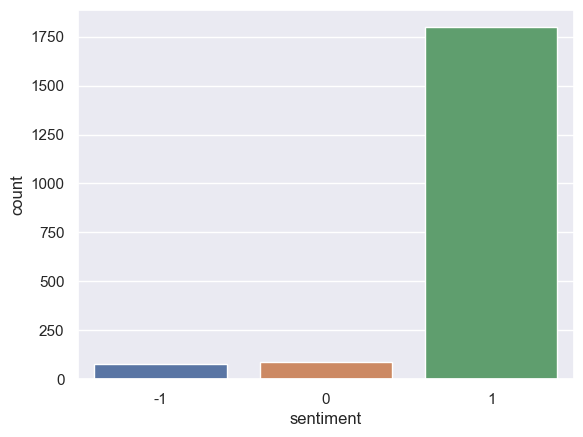

In [14]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [15]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13273/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0       0.5859
1       0.8658
2       0.0000
3       0.8689
4       0.0000
         ...  
1959    0.9028
1960    0.0000
1961    0.0000
1962    0.4215
1963    0.7579
Name: review_sentiment, Length: 1964, dtype: float64

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf = LinearSVC(random_state=0)

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)

report=classification_report(y_test, y_test_pred, output_dict=True)
report

In [ ]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2022

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

In [23]:
# make altered data into csv file
df.to_csv('altdata/' + 'shujiao.csv', index=False)